In [1]:
from sqlalchemy import create_engine
from config import database_url
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
database_url
engine = create_engine(database_url)
conn = engine.connect()

In [3]:
data = pd.read_sql("select t.title, round(avg(s.salary), 2) as avg_salary from titles as t join salaries as s on t.emp_no = s.emp_no where s.from_date between t.from_date and t.to_date and s.to_date between t.from_date and t.to_date group by t.title", conn)
data

,title,avg_salary
0,Assistant Engineer,48493.20
1,Engineer,48547.81
2,Manager,57290.78
3,Senior Engineer,48425.34
4,Senior Staff,58548.39
5,Staff,58465.50
6,Technique Leader,48581.54


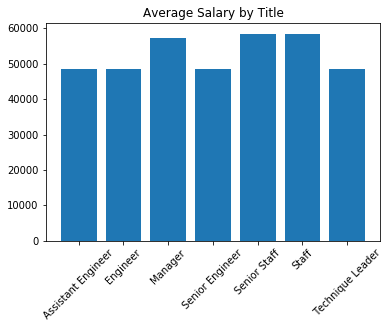

In [4]:
plt.bar(data["title"], data["avg_salary"])
plt.xticks(rotation=45)
plt.title("Average Salary by Title")
plt.show()